In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from matplotlib import pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import densenet161
import numpy as np


In [ ]:

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())


test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 170M/170M [00:04<00:00, 34.6MB/s]


In [ ]:
from PIL import Image

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
import torch.optim as optim


transform_gray = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Resize((320, 240)),
    transforms.Normalize((0.5,), (0.5,))
])

transform_rgb = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((160, 120)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


train_dataset = datasets.CIFAR10(root='./data', train=True, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True)


def custom__fn(batch):
    images_gray = []
    images_rgb = []
    for image, _ in batch:
        images_gray.append(transform_gray(image))
        images_rgb.append(transform_rgb(image))
    return torch.stack(images_gray), torch.stack(images_rgb)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=custom__fn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=custom__fn)


for image_gray, image_rgb in train_loader:

    break


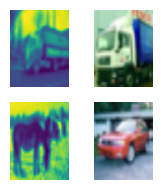

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(2, 2))

for i in range(2):
    for j in range(2):
        ax = axes[i, j]

        if j == 0:
            image_to_display = image_gray[i * 2 + j].permute(1, 2, 0).numpy()
        else:
            image_to_display = image_rgb[i * 2 + j].permute(1, 2, 0).numpy()
            image_to_display = (image_to_display - image_to_display.min()) / (image_to_display.max() - image_to_display.min())

        ax.imshow(image_to_display)
        ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from torchvision.models import densenet161
from torchsummary import summary

model = densenet161(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:01<00:00, 98.4MB/s]


In [ ]:
input_tensor = torch.randn(1, 3, 320, 240)
output = model(input_tensor)

In [ ]:
output.shape

torch.Size([1, 1000])

In [ ]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_se

In [ ]:
import torch.nn as nn

In [ ]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
# # BottleNeck layer 1
# batch_norm1 = nn.BatchNorm2d(2208)
# relu_act1 = nn.ReLU(inplace=True)
# botl1 = nn.Conv2d(2208, 512, kernal_size=(1,1))

In [ ]:
# # Deconvolution layer 2
# batch_norm2 = nn.BatchNorm2d(512)
# relu_act2 = nn.ReLU(inplace=True)
# deconv2 = nn.ConvTranspose2d(512, 256, kernel_size=(5,5), stride=(2,2), padding=(1,1))
# ####
# avg_pooling2 = nn.AvgPool2d(kernel_size=(1,2), stride=(1, 1))


In [ ]:
# # Deconvolution layer 3
# batch_norm3 = nn.BatchNorm2d(512)
# relu_act3 = nn.ReLU(inplace=True)
# deconv3 = nn.ConvTranspose2d(512, 256, kernel_size=(5,5), stride=(2,2), padding=(1,1))
# ###
# avg_pooling3 = nn.AvgPool2d(kernel_size=(2,2), stride=(1, 1))

In [ ]:
# # Deconvolution layer 4
# batch_norm4 = nn.BatchNorm2d(256)
# relu_act4 = nn.ReLU(inplace=True)
# deconv4 = nn.ConvTranspose2d(256, 64, kernel_size=(5,5), stride=(2,2), padding=(1,1))
# ###
# avg_pooling4 = nn.AvgPool2d(kernel_size=(2,2), stride=(1, 1))

In [ ]:
# # Deconvolution layer 5
# batch_norm5 = nn.BatchNorm2d(128)
# relu_act5 = nn.ReLU(inplace=True)
# deconv5 = nn.ConvTranspose2d(128, 3, kernel_size=(5,5), stride=(2,2), padding=(1,1))
# ###
# avg_pooling5 = nn.AvgPool2d(kernel_size=(2,2), stride=(1, 1))

In [ ]:
def bottleneck_layer(in_channels, out_channels):
    return nn.Sequential(
        nn.BatchNorm2d(in_channels),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels, out_channels, kernel_size=(1, 1))
    )

def deconvolution_layer(in_channels, out_channels):
    return nn.Sequential(
        nn.BatchNorm2d(in_channels),
        nn.ReLU(inplace=True),
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size=(5, 5), stride=2, padding=(2, 1)) # Adjusted padding
    )

def square_box():
    return nn.Sequential(
        nn.AvgPool2d(kernel_size=(2, 2), stride=(1, 1), padding=(1, 0))
    )

def linear_box():
    return nn.Sequential(
        nn.AvgPool2d(kernel_size=(1, 2), stride=(1, 1), padding=(0, 0))
    )

In [ ]:


class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.original_model = densenet161(weights=True)
        features = self.original_model.features

        self.conv0 = nn.Conv2d(1, 96, kernel_size=7, stride=2, padding=3, bias=False)
        self.norm0 = nn.BatchNorm2d(96)
        self.relu0 = nn.ReLU(inplace=True)
        self.pool0 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.denseblock1 = features.denseblock1
        self.transition1 = features.transition1
        self.denseblock2 = features.denseblock2
        self.transition2 = features.transition2
        self.denseblock3 = features.denseblock3
        self.transition3 = features.transition3
        self.denseblock4 = features.denseblock4
        self.norm5 = features.norm5

        self.bottleneck1 = bottleneck_layer(2208, 512)
        self.bottleneck2 = bottleneck_layer(2112, 256)
        self.bottleneck3 = bottleneck_layer(768, 128)
        self.bottleneck4 = bottleneck_layer(384, 64)

        self.deconv1 = deconvolution_layer(512, 256)
        self.deconv2 = deconvolution_layer(512, 128)
        self.deconv3 = deconvolution_layer(256, 64)
        self.deconv4 = deconvolution_layer(128, 3)

        self.linear_box1 = linear_box()
        self.square_box1 = square_box()
        self.square_box2 = square_box()
        self.square_box3 = square_box()

    def forward(self, x):
        x = self.conv0(x)
        x = self.norm0(x)
        x = self.relu0(x)
        x_pool0 = self.pool0(x)

        block1_features = [x_pool0]
        for i, layer in enumerate(self.denseblock1.children()):
            new_features = layer(block1_features)
            block1_features.append(new_features)
            if i == 5:
                skip1 = torch.cat(block1_features, 1)
                # print("skip1 shape : ", skip1.shape)

        x_block1_out = torch.cat(block1_features, 1)
        x_trans1 = self.transition1(x_block1_out)

        block2_features = [x_trans1]
        for i, layer in enumerate(self.denseblock2.children()):
            new_features = layer(block2_features)
            block2_features.append(new_features)
            if i == 11:
                skip2 = torch.cat(block2_features, 1)
                # print("skip2 shape : ", skip2.shape)

        x_block2_out = torch.cat(block2_features, 1)
        x_trans2 = self.transition2(x_block2_out)

        block3_features = [x_trans2]
        for i, layer in enumerate(self.denseblock3.children()):
            new_features = layer(block3_features)
            block3_features.append(new_features)
            if i == 35:
                skip3 = torch.cat(block3_features, 1)
                # print("skip3 shape : ", skip3.shape)

        x_block3_out = torch.cat(block3_features, 1)
        x_trans3 = self.transition3(x_block3_out)

        block4_features = [x_trans3]
        x_encoder_output = None
        for i, layer in enumerate(self.denseblock4.children()):
            new_features = layer(block4_features)
            block4_features.append(new_features)
            if i == 23:
                x_encoder_output = torch.cat(block4_features, 1)
                # print("output shape : ", x_encoder_output.shape)
                break

        x = self.bottleneck1(x_encoder_output)
        # print("bottleneck1 shape : ", x.shape)
        # print("x shape : ", x.shape)
        x = self.deconv1(x)
        # print("DCL1 shape : ", x.shape)
        x = F.pad(x, (1, 0, 1, 0))
        x = self.linear_box1(x)

        # print("linear1 shape : ", x.shape)

        x = torch.cat([x, self.bottleneck2(skip3)], dim=1)
        # print("concatination1 shape : ", x.shape)
        x = self.deconv2(x)
        x = self.square_box1(x)
        # print("DCL2 shape : ", x.shape)

        x = torch.cat([x, self.bottleneck3(skip2)], dim=1)
        # print("concatination2 shape : ", x.shape)
        x = self.deconv3(x)
        x = self.square_box2(x)
        # print("DCL3 shape : ", x.shape)

        x = torch.cat([x, self.bottleneck4(skip1)], dim=1)
        # print("concatination3 shape : ", x.shape)
        x = self.deconv4(x)
        x = self.square_box3(x)
        # print("DCL4 shape : ", x.shape)

        return x

model = MyModel()
model.eval()

input_tensor = torch.randn(1, 1, 320, 240)

with torch.no_grad():
    output = model(input_tensor)

print("Output shape:", output.shape)

Output shape: torch.Size([1, 3, 160, 120])


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
criterion = nn.MSELoss()

# Define the optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the number of epochs
epochs = 2
train_loss = []
model = model.to(device)
# Training loop
for epoch in range(epochs):
    running_loss = 0.0
    for image_gray, image_rgb in train_loader:
        # Move data to the selected device
        image_gray = image_gray.to(device)
        image_rgb = image_rgb.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(image_gray)
        # print(outputs.shape)

        # Calculate the loss
        loss = criterion(outputs, image_rgb)


        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        # Update running loss
        running_loss += loss.item()
        # print(loss.item())

    # Print epoch loss
    print(f"Epoch [{epoch + 1}/{epochs}] Loss: {running_loss / len(train_loader):.4f}")

print("Training finished!")

torch.Size([16, 3, 160, 120])
0.29274868965148926
torch.Size([16, 3, 160, 120])
0.1575576812028885
torch.Size([16, 3, 160, 120])
0.041917044669389725
torch.Size([16, 3, 160, 120])
12.627869606018066
torch.Size([16, 3, 160, 120])
0.32282838225364685
torch.Size([16, 3, 160, 120])
0.2444361448287964
torch.Size([16, 3, 160, 120])
0.15789805352687836
torch.Size([16, 3, 160, 120])
0.08872929960489273
torch.Size([16, 3, 160, 120])
0.09934122860431671
torch.Size([16, 3, 160, 120])
0.11662323772907257
torch.Size([16, 3, 160, 120])
0.06923989951610565
torch.Size([16, 3, 160, 120])
0.058496907353401184
torch.Size([16, 3, 160, 120])
0.0954829528927803
torch.Size([16, 3, 160, 120])
0.0778360590338707
torch.Size([16, 3, 160, 120])
0.04894493147730827
torch.Size([16, 3, 160, 120])
0.04613500088453293
torch.Size([16, 3, 160, 120])
0.042157724499702454
torch.Size([16, 3, 160, 120])
0.03087032400071621
torch.Size([16, 3, 160, 120])
0.04146689176559448
torch.Size([16, 3, 160, 120])
0.04497688263654709
to

KeyboardInterrupt: 

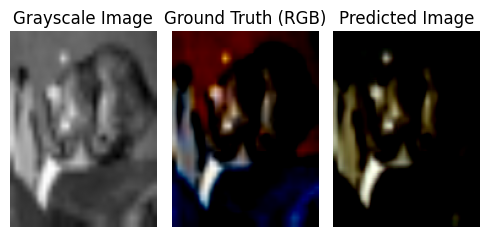

In [ ]:

image_gray, image_rgb = next(iter(test_loader))

image_gray = image_gray.to(device)
image_rgb = image_rgb.to(device)


model.eval()
with torch.no_grad():
    predicted_image = model(image_gray)

image_gray = image_gray[0].cpu().permute(1, 2, 0).numpy()
image_rgb = image_rgb[0].cpu().permute(1, 2, 0).numpy()
predicted_image = predicted_image[0].cpu().permute(1, 2, 0).numpy()


fig, axes = plt.subplots(1, 3, figsize=(5, 5))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[1].imshow(image_rgb)
axes[1].set_title('Ground Truth (RGB)')
axes[2].imshow(predicted_image)
axes[2].set_title('Predicted Image')


for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()